In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        directory = r"chest_xray/train/",
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 5216 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        directory = r"chest_xray/test/",
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 624 images belonging to 2 classes.


In [4]:
validation = ImageDataGenerator(rescale=1./255)
vall = test_datagen.flow_from_directory(
        directory = r"chest_xray/val/",
        target_size=(64 , 64),
        batch_size=32,
        class_mode='binary')

Found 16 images belonging to 2 classes.


CNN [Init]

In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
#Step1:- Convolution 

cnn.add(tf.keras.layers.Conv2D(filters = 32 , kernel_size = 3 , activation = 'relu' ))
cnn.add(keras.Input(shape=(64, 64, 3)))

Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D( pool_size = 2 , strides = 2))

Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())

Adding the output layer

In [9]:
cnn.add(tf.keras.layers.Dense(units = 1 , activation = 'sigmoid'))

Compile the model

In [10]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fitting the model

In [11]:
history=cnn.fit(x = training_set , validation_data = vall , epochs = 25)

Epoch 1/25
163/163 [==============================] - 81s 494ms/step - loss: 0.3695 - accuracy: 0.8359 - val_loss: 0.5131 - val_accuracy: 0.6875
Epoch 2/25
163/163 [==============================] - 45s 273ms/step - loss: 0.2452 - accuracy: 0.9003 - val_loss: 0.3847 - val_accuracy: 0.9375
Epoch 3/25
163/163 [==============================] - 43s 266ms/step - loss: 0.2094 - accuracy: 0.9137 - val_loss: 0.4647 - val_accuracy: 0.7500
Epoch 4/25
163/163 [==============================] - 43s 266ms/step - loss: 0.1967 - accuracy: 0.9214 - val_loss: 0.5126 - val_accuracy: 0.6875
Epoch 5/25
163/163 [==============================] - 44s 269ms/step - loss: 0.1874 - accuracy: 0.9275 - val_loss: 0.3085 - val_accuracy: 0.8125
Epoch 6/25
163/163 [==============================] - 45s 274ms/step - loss: 0.1795 - accuracy: 0.9283 - val_loss: 0.3189 - val_accuracy: 0.8750
Epoch 7/25
163/163 [==============================] - 43s 263ms/step - loss: 0.1712 - accuracy: 0.9339 - val_loss: 0.3719 - val_ac

Evaluation

In [12]:
test_loss, test_acc = cnn.evaluate(test_set, verbose=2)
print("The accuracy of the model is:")
print(test_acc)

20/20 - 15s - loss: 0.3938 - accuracy: 0.8606 - 15s/epoch - 774ms/step
The accuracy of the model is:
0.8605769276618958


Plot the accuracy

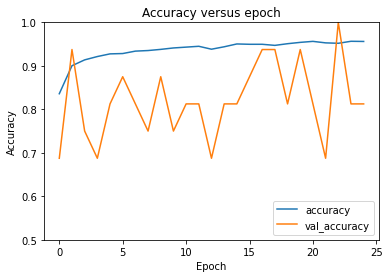

In [13]:
plt.title("Accuracy versus epoch")
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

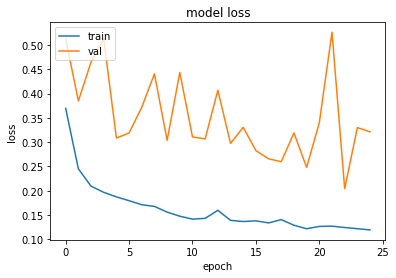

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Predicting

In [54]:
import numpy as np
#from keras.preprocessing import image

test_image = tf.keras.utils.load_img('chest_xray/Dataset_Test/e2.jpeg', target_size = (64, 64))
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 0:
  prediction = 'Normal'
else:
  prediction = 'Pneumonia'

print(prediction)

1/1 [==============================] - 0s 65ms/step
Pneumonia
